## Pseudo : Harizo

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
client_train = pd.read_csv('client_train.csv')
invoice_train = pd.read_csv('invoice_train.csv')

C:\Users\prodigy-170\AppData\Local\Temp\ipykernel_19608\461573585.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  invoice_train = pd.read_csv('invoice_train.csv')


In [5]:
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [6]:
client_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


## 2 ) a - Analyse de forme

#### - Target variables : *target*

In [7]:
target = client_train['target']

#### - Dimension de donnée :
- client_train : 135493 lignes, 6 colonnes
- invoice_train : 4476749 lignes, 16 colonnes

In [8]:
print(client_train.shape)
print(invoice_train.shape)

(135493, 6)
(4476749, 16)


#### - Types de variables :
- **client_train :** 
    - numérique : 4
    - catégoriel : 2
- **invoice_train :**
    - numérique : 12
    - catégoriel : 4

In [9]:
print((client_train.dtypes).value_counts())
print((invoice_train.dtypes).value_counts())

int64      3
object     2
float64    1
Name: count, dtype: int64
int64     12
object     4
Name: count, dtype: int64


#### - Analyse des valeurs manquantes :
- Notre datasets ne présente pas de valeur manquantes (0 % de NaN)

In [10]:
print((client_train.isna()).sum() / client_train.size)
print((invoice_train.isna()).sum() / invoice_train.size)

disrict          0.0
client_id        0.0
client_catg      0.0
region           0.0
creation_date    0.0
target           0.0
dtype: float64
client_id               0.0
invoice_date            0.0
tarif_type              0.0
counter_number          0.0
counter_statue          0.0
counter_code            0.0
reading_remarque        0.0
counter_coefficient     0.0
consommation_level_1    0.0
consommation_level_2    0.0
consommation_level_3    0.0
consommation_level_4    0.0
old_index               0.0
new_index               0.0
months_number           0.0
counter_type            0.0
dtype: float64


## 2 ) b - Analyse de fond : 

#### - Visualisation de la target :
- Variables binaires
- valeur '0' : 94.4% et valeur '1' : 5.6%

In [11]:
target.unique()

array([0., 1.])

<Axes: ylabel='count'>

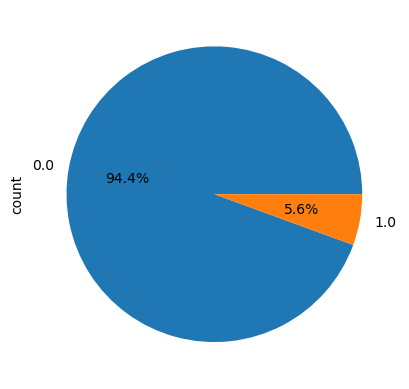

In [12]:
target.value_counts().plot.pie(autopct='%1.1f%%')

#### - Compréhension des variables 

In [13]:
features = client_train.drop('target', axis = 1)

In [14]:
features_num = features.select_dtypes(['float', 'int'])
features_cat = features.select_dtypes('object')

In [15]:
for col in features_num.columns:
    print(f'{col} : {features_num[col].unique()}')

disrict : [60 69 62 63]
client_catg : [11 12 51]
region : [101 107 301 105 303 103 309 311 304 104 312 305 306 308 372 307 313 310
 371 302 106 379 399 206 199]


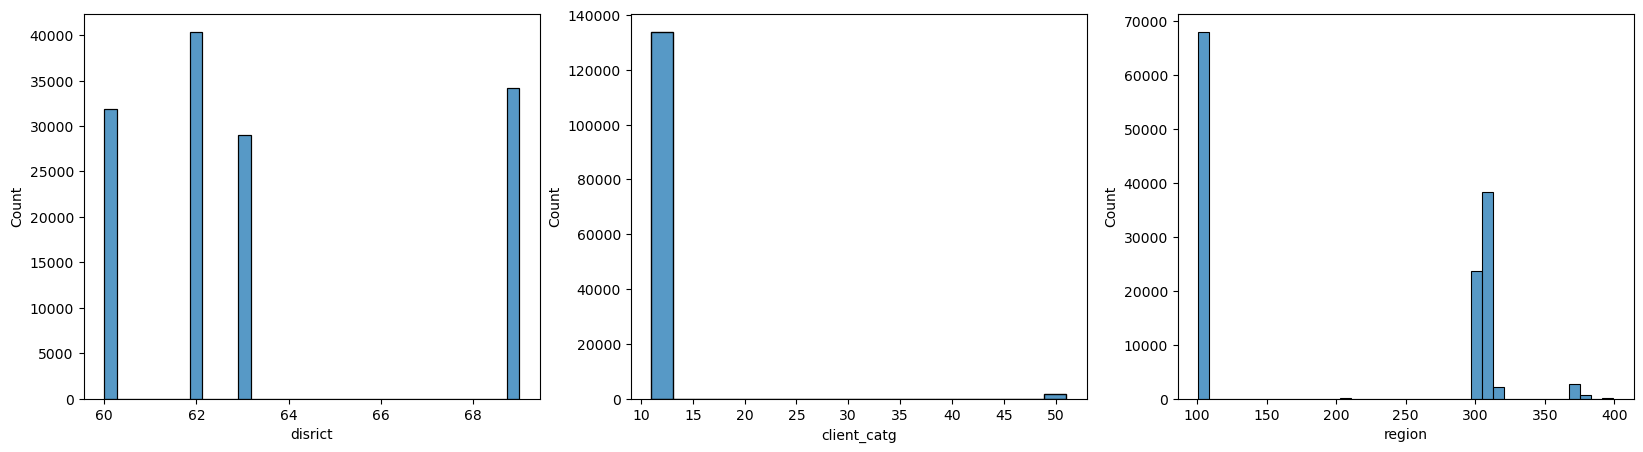

In [16]:
i = 1
plt.figure(figsize=(20, 5))
for col in features_num.columns:
    plt.subplot(1, 3, i)
    sns.histplot(features_num[col])
    i += 1

- **Client_train :**
    - Les variables numérique ont tous des valeurs discrète
    - Les variables 'client_catg' et 'region' est trés disproportionner (présence d'une valeur dominante)

In [17]:
for col in features_cat.columns:
    print(f'{col} : {features_cat[col].unique()}')

client_id : ['train_Client_0' 'train_Client_1' 'train_Client_10' ...
 'train_Client_99997' 'train_Client_99998' 'train_Client_99999']
creation_date : ['31/12/1994' '29/05/2002' '13/03/1986' ... '16/08/2004' '30/08/1978'
 '25/05/1978']


- **Client_train :**
    - La variables 'client_id' est une variables de jointure entre les données du 'client_train' et 'invoice_train'
    - L'autre variables du features catégorique est de type date

In [18]:
invoice_num = invoice_train.select_dtypes('int')
invoice_cat = invoice_train.select_dtypes('object')

In [19]:
for col in invoice_num.columns:
    print(f'{col} : {invoice_num[col].unique()}')

tarif_type : [11 40 15 10 12 14 13 45 29  9 30  8 21 42 27 18 24]
counter_number : [1335667  678902  572765 ... 4811719  262195  560948]
counter_code : [203 207 413   5 467 202 420 410  10 483  25 433 407 204 214 442 453 506
 450 403 333 201 102 305 210 101 532  40 310 565 600 307 303 222  65   0
 227 325  16 317 367   1]
reading_remarque : [  8   6   9   7 207 413 203   5]
counter_coefficient : [ 1  3  0 10  4 33 50 20  2  6 40  9 30  5 11  8]
consommation_level_1 : [   82  1200   123 ... 43053  4824  8314]
consommation_level_2 : [    0   184   186 ... 46017 29019 32001]
consommation_level_3 : [   0  800   43 ... 1710 1750 1390]
consommation_level_4 : [    0   382   132 ...  8613  8859 12645]
old_index : [ 14302  12294  14624 ... 141551 110850  86004]
new_index : [ 14384  13678  14747 ... 168700 127495  83410]
months_number : [     4     12      8 ... 367445 459733 463554]


C:\Users\prodigy-170\AppData\Local\Temp\ipykernel_19608\3367120809.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(invoice_num[col].head())
c:\Users\prodigy-170\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\prodigy-170\AppData\Local\Temp\ipykernel_19608\3367120809.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar 

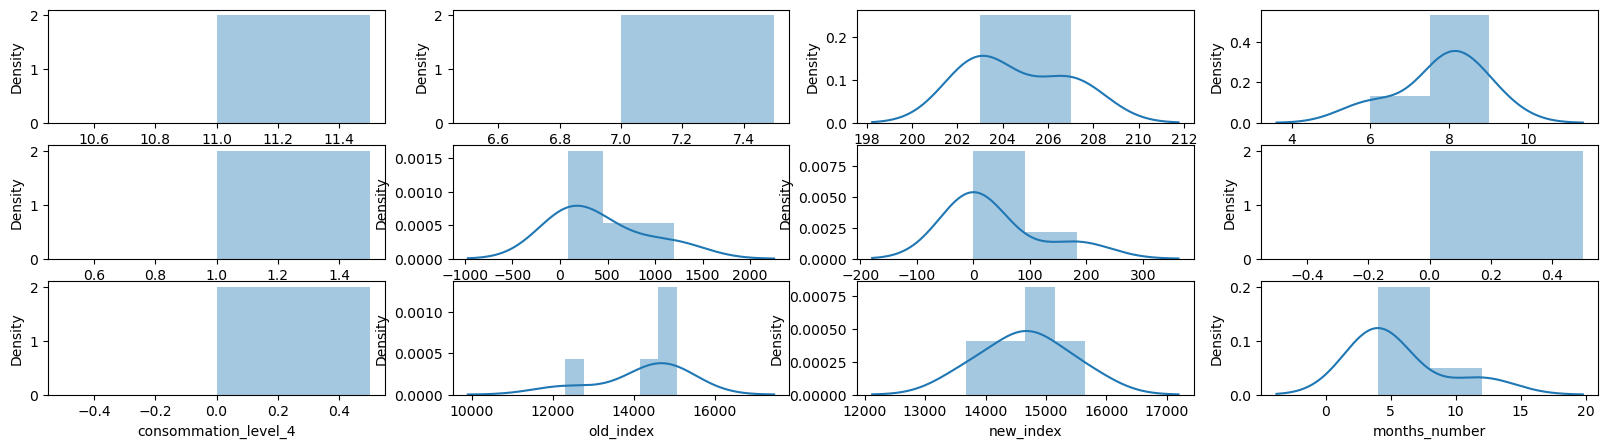

In [20]:
i = 1
plt.figure(figsize=(20, 5))
for col in invoice_num.columns:
    plt.subplot(3, 4, i)
    sns.distplot(invoice_num[col].head())
    i += 1

- **invoice_train :**
    - Les variables numérique du datasets 'invoice_train' présente des valeurs discrète et valeur continue
    - Dans les variables catégoriel, la variables 'counter_statue' n'a pas de structure bien définie

In [21]:
for col in invoice_cat.columns:
    print(f'{col} : {invoice_cat[col].unique()}')

client_id : ['train_Client_0' 'train_Client_1' 'train_Client_10' ...
 'train_Client_99997' 'train_Client_99998' 'train_Client_99999']
invoice_date : ['2014-03-24' '2013-03-29' '2015-03-23' ... '1995-11-28' '1982-07-04'
 '1996-09-02']
counter_statue : [0 1 5 4 3 2 769 '0' '5' '1' '4' 'A' 618 269375 46 420]
counter_type : ['ELEC' 'GAZ']


## 3 ) Data preparation

In [22]:
data = pd.merge(client_train, invoice_train, on='client_id', how='right')

In [23]:
pd.set_option('display.max_columns', 21)

In [24]:
col_drop = ['disrict', 'client_id', 'creation_date', 'creation_date', 'counter_statue', 'client_catg', 'region', 'reading_remarque', 'invoice_date']

In [25]:
data = data.drop(col_drop, axis=1)

In [26]:
client_test = pd.read_csv('client_test.csv')
invoice_test = pd.read_csv('invoice_test.csv')

In [27]:
data_test = pd.merge(client_test, invoice_test, on='client_id', how='right')

In [28]:
data_test = data_test.drop(col_drop, axis=1)

In [33]:
y = data['target']
X = data.drop('target', axis=1)


In [30]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline 

## 4) Modeling

In [31]:
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [38]:
pipeline = make_pipeline(OrdinalEncoder(), StandardScaler(), svm.SVR(kernel='linear'))

In [40]:
pipeline.fit(X_train, y_train)

In [ ]:
pipeline.score(X_test, y_test)

In [ ]:
accuracy_score(y_test, pipeline.predict(X_test))

In [ ]:
test = data_test

In [ ]:
submission = pd.DataFrame(
    {
        'client_id': sub_client_id,
        'target': pipeline.predict(test)
    }
)